In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mgrs
import sqlite3
import math

In [19]:
def missingByCol(df): #count missing values by column
    for col in df.columns:
        if df[col].isna().sum() != 0:
            print(col, df[col].isna().sum())

In [20]:
weather = pd.read_csv('2000to2015_Weather_v2.csv')
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2249940 entries, 0 to 2249939
Data columns (total 14 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   Unnamed: 0                     int64  
 1   lat                            float64
 2   lon                            float64
 3   t_mean_2m_24h:F                float64
 4   t_min_2m_24h:F                 float64
 5   t_max_2m_24h:F                 float64
 6   precip_24h:mm                  float64
 7   sunshine_duration_24h:min      float64
 8   drought_index:idx              float64
 9   soil_moisture_index_-15cm:idx  float64
 10  soil_type:idx                  float64
 11  wind_speed_2m:mph              float64
 12  elevation:m                    float64
 13  date                           object 
dtypes: float64(12), int64(1), object(1)
memory usage: 240.3+ MB


<AxesSubplot:>

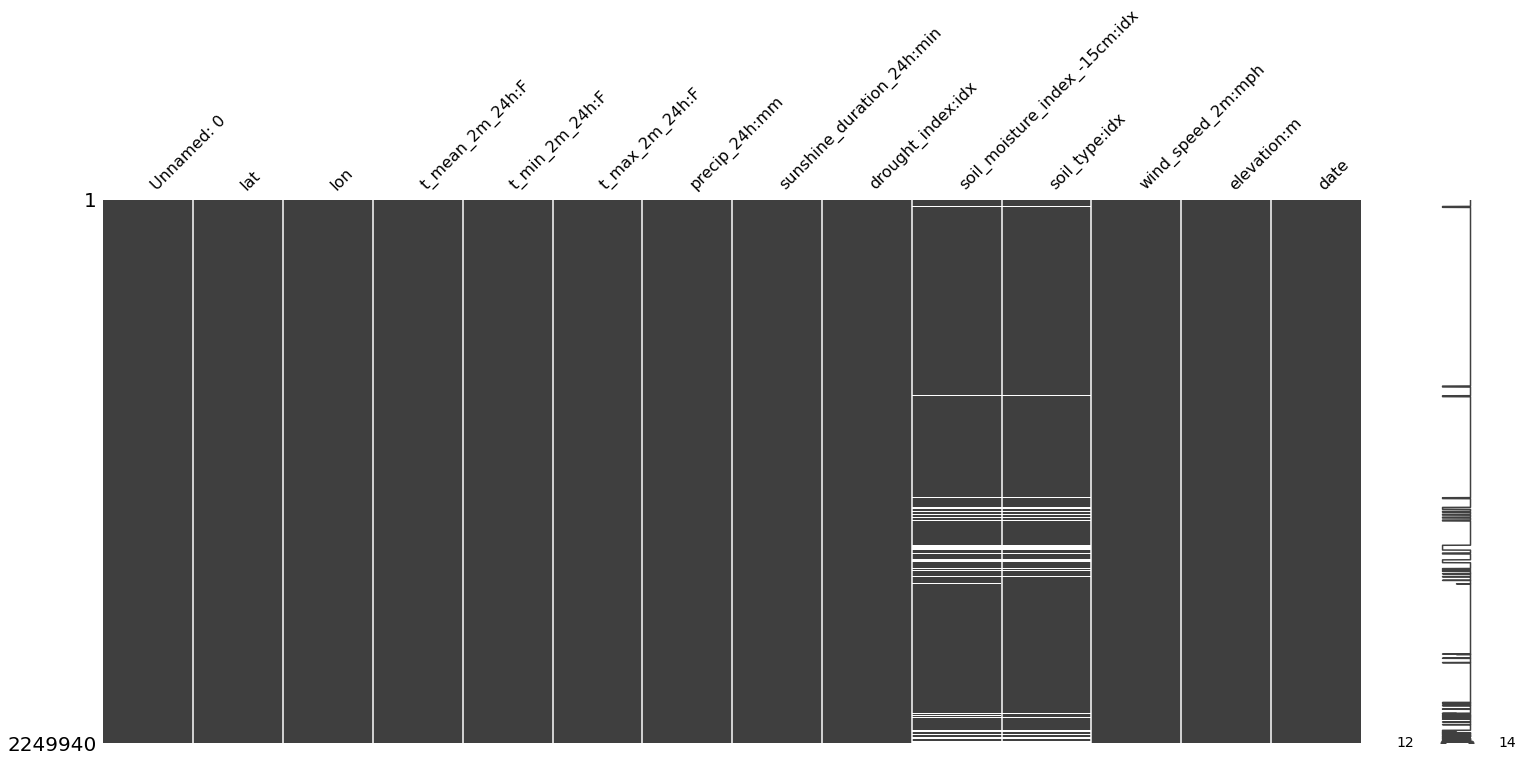

In [21]:
import missingno as msno

msno.matrix(weather)

In [22]:
weather[weather['soil_type:idx'].isnull()]

,Unnamed: 0,lat,lon,t_mean_2m_24h:F,t_min_2m_24h:F,t_max_2m_24h:F,precip_24h:mm,sunshine_duration_24h:min,drought_index:idx,soil_moisture_index_-15cm:idx,soil_type:idx,wind_speed_2m:mph,elevation:m,date
28126,28126,33.615982,-117.970214,52.9,48.6,57.8,0.66,267.6,-4.0,NaN,NaN,5.6,0.0,2000-01-01 00:00:00+00:00
28127,28127,33.615982,-117.970214,54.0,50.5,59.5,0.28,574.8,-4.0,NaN,NaN,10.1,0.0,2000-01-02 00:00:00+00:00
28128,28128,33.615982,-117.970214,53.4,45.2,64.4,0.00,597.9,-4.0,NaN,NaN,4.6,0.0,2000-01-03 00:00:00+00:00
28129,28129,33.615982,-117.970214,55.2,46.3,65.8,0.00,598.8,-4.0,NaN,NaN,6.5,0.0,2000-01-04 00:00:00+00:00
28130,28130,33.615982,-117.970214,55.0,46.4,66.8,0.00,599.7,-4.0,NaN,NaN,3.1,0.0,2000-01-05 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2249935,2249935,33.167642,-117.536254,54.2,48.3,61.9,0.00,598.0,-1.0,NaN,NaN,4.5,0.0,2015-12-27 00:00:00+00:00
2249936,2249936,33.167642,-117.536254,53.6,49.7,57.2,0.08,212.6,-1.0,NaN,NaN,3.1,0.0,2015-12-28 00:00:00+00:00
2249937,2249937,33.167642,-117.536254,52.6,48.1,56.8,0.07,557.9,-1.0,NaN,NaN,1.8,0.0,2015-12-29 00:00:00+00:00
2249938,2249938,33.167642,-117.536254,53.9,49.7,57.7,0.00,568.3,-2.0,NaN,NaN,7.2,0.0,2015-12-30 00:00:00+00:00


In [23]:
soil_type_missing = pd.DataFrame()
soil_type_missing['lat'] = weather['lat'][weather['soil_type:idx'].isnull()].tolist()
soil_type_missing['lon'] = weather['lon'][weather['soil_type:idx'].isnull()].tolist()
soil_type_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136651 entries, 0 to 136650
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   lat     136651 non-null  float64
 1   lon     136651 non-null  float64
dtypes: float64(2)
memory usage: 2.1 MB


In [24]:
soil_type_missing.drop_duplicates(inplace=True)
soil_type_missing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 0 to 135918
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   lat     47 non-null     float64
 1   lon     47 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB


In [25]:
# soil_type_missing.to_csv('soil_type_missing.csv',index=False)

In [26]:
weather['soil_type:idx'].unique()

array([ 2., nan,  3.,  1.,  4.])

In [27]:
weather['soil_type:idx'].value_counts()

2.0    1509871
3.0     588758
1.0       8796
4.0       5864
Name: soil_type:idx, dtype: int64

soil_type:idx
Soil Type	Description     
0	Ocean/Lake      
1	Coarse      
2	Medium      
3	Medium Fine     
4	Fine        
5	Very Fine       
6	Organic     
7	Tropical Organic        

In [28]:
missingByCol(weather)

soil_moisture_index_-15cm:idx 138117
soil_type:idx 136651


In [29]:
weather.groupby('soil_type:idx')['soil_moisture_index_-15cm:idx'].mean()

soil_type:idx
1.0    0.048844
2.0    0.238938
3.0    0.076592
4.0    0.068733
Name: soil_moisture_index_-15cm:idx, dtype: float64

In [30]:
weather['soil_type:idx'] = weather['soil_type:idx'].fillna(4)
missingByCol(weather)

soil_moisture_index_-15cm:idx 138117


In [31]:
weather['soil_moisture_index_-15cm:idx'] = weather['soil_moisture_index_-15cm:idx'].fillna(0.068733)
missingByCol(weather)

In [32]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2249940 entries, 0 to 2249939
Data columns (total 14 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   Unnamed: 0                     int64  
 1   lat                            float64
 2   lon                            float64
 3   t_mean_2m_24h:F                float64
 4   t_min_2m_24h:F                 float64
 5   t_max_2m_24h:F                 float64
 6   precip_24h:mm                  float64
 7   sunshine_duration_24h:min      float64
 8   drought_index:idx              float64
 9   soil_moisture_index_-15cm:idx  float64
 10  soil_type:idx                  float64
 11  wind_speed_2m:mph              float64
 12  elevation:m                    float64
 13  date                           object 
dtypes: float64(12), int64(1), object(1)
memory usage: 240.3+ MB
